In [2]:
import tensorflow as tf
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [3]:
img_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    '../Dataset/leaf_type',
    shuffle = True,
    image_size = (256, 256),
    batch_size = 32)
class_names = img_dataset.class_names
print(class_names)

Found 3000 files belonging to 2 classes.
['other_leaves', 'tomato_leave']


In [20]:
data_directory = '../Dataset/leaf_type'

# Define image data generator for preprocessing and augmentation
datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    validation_split=0.2  # Percentage of data to use for validation
)

# Load and split the dataset into training and testing sets
train_generator = datagen.flow_from_directory(
    data_directory,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    seed=42
)

validation_generator = datagen.flow_from_directory(
    data_directory,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    seed=42
)

Found 2400 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


In [21]:
# Define model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(2, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
hist1 = model.fit(train_generator, epochs=10, validation_data=validation_generator, steps_per_epoch=50)

Epoch 1/10
50/50 [==============================] - 43s 863ms/step - loss: 1.0257 - accuracy: 0.8394 - val_loss: 0.0765 - val_accuracy: 0.9867
Epoch 2/10
50/50 [==============================] - 43s 853ms/step - loss: 0.1037 - accuracy: 0.9644 - val_loss: 0.0156 - val_accuracy: 0.9967
Epoch 3/10
50/50 [==============================] - 42s 849ms/step - loss: 0.0499 - accuracy: 0.9825 - val_loss: 0.0812 - val_accuracy: 0.9750
Epoch 4/10
50/50 [==============================] - 42s 848ms/step - loss: 0.0685 - accuracy: 0.9756 - val_loss: 0.0376 - val_accuracy: 0.9900
Epoch 5/10
50/50 [==============================] - 43s 852ms/step - loss: 0.0212 - accuracy: 0.9931 - val_loss: 0.0139 - val_accuracy: 0.9967
Epoch 6/10
50/50 [==============================] - 43s 859ms/step - loss: 0.0062 - accuracy: 0.9975 - val_loss: 0.0077 - val_accuracy: 0.9967
Epoch 7/10
50/50 [==============================] - 43s 860ms/step - loss: 0.0118 - accuracy: 0.9956 - val_loss: 0.0864 - val_accuracy: 0.9667

In [24]:
model.save('v2.keras')

In [25]:
test_loss, test_acc = model.evaluate(validation_generator)
print('Validation accuracy:', test_acc)

19/19 [==============================] - 3s 172ms/step - loss: 0.0133 - accuracy: 0.9967
Validation accuracy: 0.996666669845581


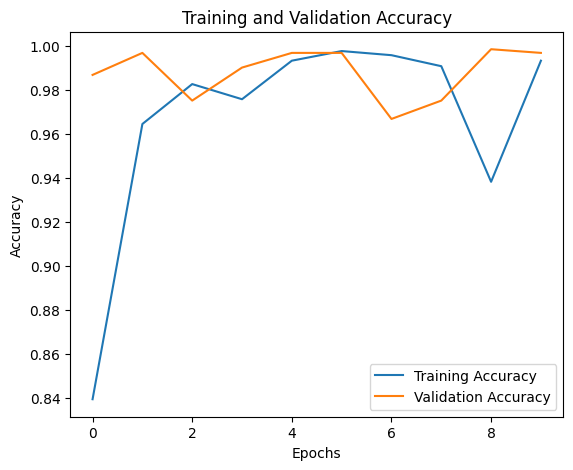

In [26]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(hist1.history['accuracy'], label='Training Accuracy ')
plt.plot(hist1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

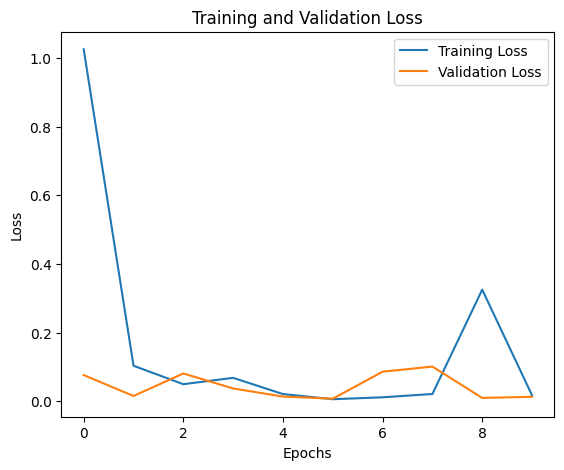

In [27]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(hist1.history['loss'], label='Training Loss ')
plt.plot(hist1.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [3]:
img_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    '../Dataset/disease_type/augmented_data',
    shuffle = True,
    image_size = (256, 256),
    batch_size = 32)
class_names = img_dataset.class_names
print(class_names)

Found 8000 files belonging to 3 classes.
['Tomato___Bacterial_spot', 'Tomato___Healthy', 'Tomato___Yellow_Leaf_Curl_Virus']


In [7]:
data_directory = '../Dataset/disease_type/augmented_data'

# Define image data generator for preprocessing and augmentation
datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    validation_split=0.2  # Percentage of data to use for validation
)

# Load and split the dataset into training and testing sets
train_generator = datagen.flow_from_directory(
    data_directory,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    seed=42
)

validation_generator = datagen.flow_from_directory(
    data_directory,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    seed=42
)

Found 6400 images belonging to 3 classes.
Found 1600 images belonging to 3 classes.


In [10]:
# Define model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.25),
    Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
hist2 = model.fit(train_generator, epochs=15, validation_data=validation_generator, steps_per_epoch=50)

Epoch 1/15
50/50 [==============================] - 51s 1s/step - loss: 0.1734 - accuracy: 0.9375 - val_loss: 0.1356 - val_accuracy: 0.9500
Epoch 2/15
50/50 [==============================] - 48s 958ms/step - loss: 0.1533 - accuracy: 0.9506 - val_loss: 0.1287 - val_accuracy: 0.9550
Epoch 3/15
50/50 [==============================] - 44s 889ms/step - loss: 0.1735 - accuracy: 0.9425 - val_loss: 0.2268 - val_accuracy: 0.9100
Epoch 4/15
50/50 [==============================] - 44s 888ms/step - loss: 0.2374 - accuracy: 0.9150 - val_loss: 0.1596 - val_accuracy: 0.9425
Epoch 5/15
50/50 [==============================] - 44s 880ms/step - loss: 0.0990 - accuracy: 0.9681 - val_loss: 0.1090 - val_accuracy: 0.9663
Epoch 6/15
50/50 [==============================] - 44s 878ms/step - loss: 0.1234 - accuracy: 0.9525 - val_loss: 0.1135 - val_accuracy: 0.9619
Epoch 7/15
50/50 [==============================] - 44s 874ms/step - loss: 0.1427 - accuracy: 0.9425 - val_loss: 0.0931 - val_accuracy: 0.9669
Ep

In [75]:
model.save('v1.keras')
#model = load_model('classifier.keras')

In [13]:
test_loss, test_acc = model.evaluate(validation_generator)
print('Validation accuracy:', test_acc)

50/50 [==============================] - 7s 140ms/step - loss: 0.1175 - accuracy: 0.9625
Validation accuracy: 0.9624999761581421


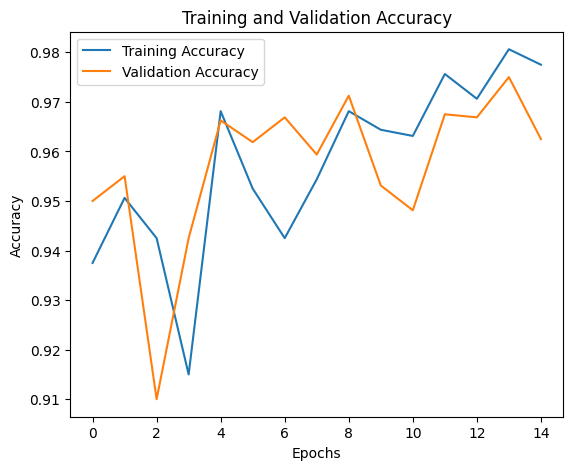

In [15]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(hist2.history['accuracy'], label='Training Accuracy ')
plt.plot(hist2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

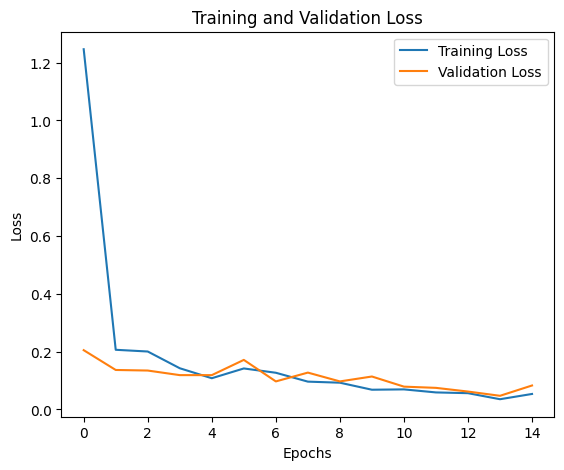

In [78]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'], label='Training Loss ')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()